In [4]:
from bs4 import BeautifulSoup
import requests
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer

In [5]:
def plot_word_freq(url):
    """Takes a url (from Project Gutenberg) and plots a word frequency
    distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
            
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)


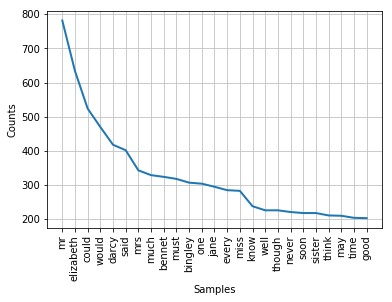

In [6]:
plot_word_freq('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm')

In [18]:
def plot_word_cloud(url):
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Join the different processed titles together.
    long_string = " ".join(words_ns)
    # Create a WordCloud object
    wordcloud = WordCloud()
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    return wordcloud.to_image()


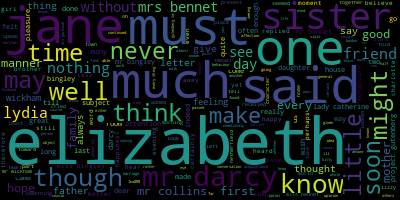

In [19]:
plot_word_cloud('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm')

In [21]:
def plot_word_cloud_jpg(url, icon):

    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)

    d = getcwd()
    ## join all documents in corpus
    text = " ".join(words_ns)

    #image saved
    icon = icon
    icon_path = "%s.jpg" % icon

    icon = Image.open(icon_path).convert("RGBA")
    mask = Image.new("RGB", icon.size, (255,255,255))
    mask.paste(icon,icon)
    mask = np.array(mask)

    # Word Cloud with colored mask
    wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=300, random_state=42)

    coloring = np.array(Image.open(icon_path))
    image_colors = ImageColorGenerator(coloring)
    image_colors.default_color = [0.6,0.6,0.6]

    # Generate a word cloud
    wc.generate(text)
    # Visualize the word cloud
    return wc.to_image()

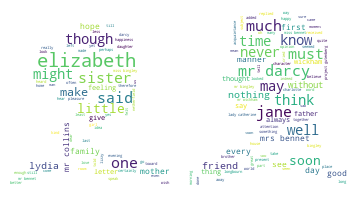

In [23]:
#pride and prejudice
plot_word_cloud_jpg('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm', 'lizzie-and-darcy')

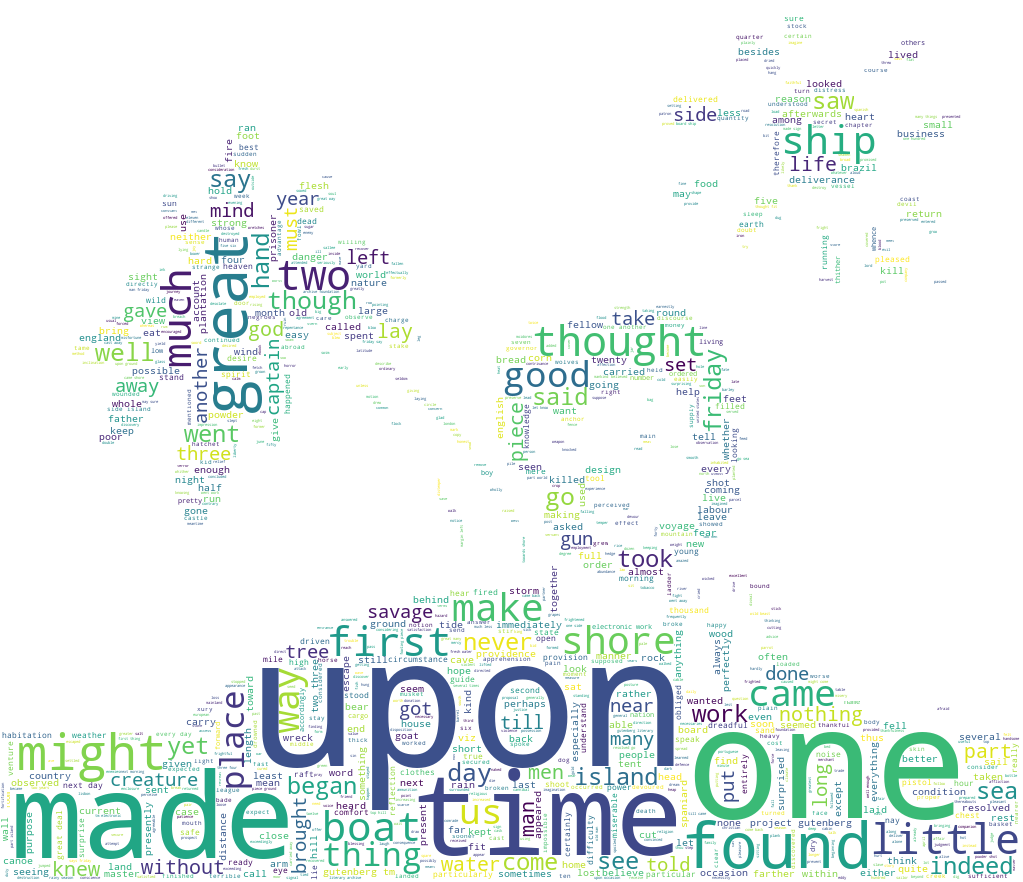

In [24]:
#Robinson Crusoe
plot_word_cloud_jpg('https://www.gutenberg.org/files/521/521-h/521-h.htm', 'depositphotos_112570152-stock-photo-character-man-desert-island-robinson' )
#'https://www.gutenberg.org/files/521/521-h/521-h.htm'
#depositphotos_112570152-stock-photo-character-man-desert-island-robinson